In [1]:
using Distributed
Distributed.addprocs(5);

In [55]:
using Grid
using Plots
using JuMIT
gr()

Plots.GRBackend()

In [60]:
pa, model=J.Gallery.xfwi_problem(:pizza);

	Seismic Model:	
	> number of samples:	x	51	z	51
	> sampling intervals:	x	40.0	z	40.0
	> vp:	min	2000.0	max	2000.0
	> vp bounds:	min	1700.0	max	2300.0
	> ρ:	min	2000.0	max	2000.0
	> ρ bounds:	min	1700.0	max	2300.0
	Acquisition Geometry:	circular acquisition geometry
	> number of supersources:	5
	> sources per supersource:	min	1	max	1
	> receivers per supersource:	min	20	max	20
	> number of unique positions of:	sources	5	receivers	20
	Source Acquisition:	
	> number of supersources:	5
	> sources per supersource:	min	1	max	1
	> frequency:	min	0.3538461538461538	max	8.846153846153845	peak	2.8307692307692305
	> time:	min	0.0	max	2.8173913043478263
	> samples:	325


┌ Warning: decrease spatial sampling (4.00e+01) below 3.84e+01
└ @ JuMIT.Fdtd /math/home/pawbz/.julia/dev/JuMIT/src/Fdtd/Fdtd.jl:1010


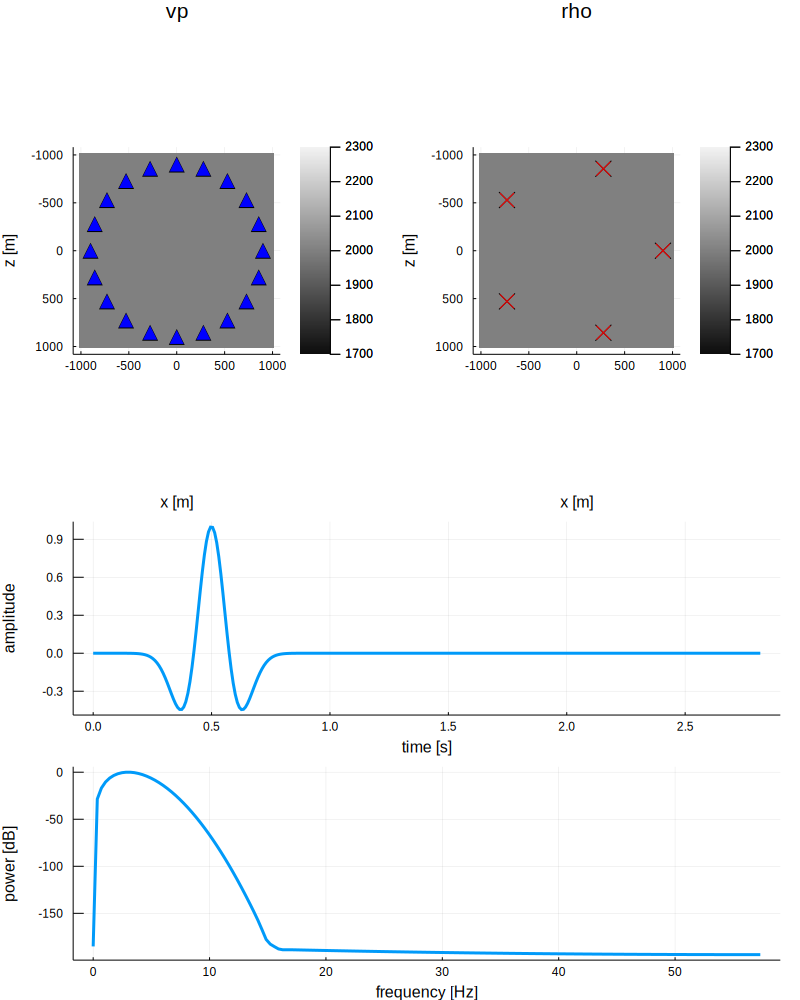

In [61]:
p1=JP.seismic(pa.modm, use_bounds=true)
JP.geom!(pa.acqgeom, markersize=7, subplot=[1,2])
p2=JP.src(pa.acqsrc, w=3)
plot(p1,p2, layout=(2,1), size=(800,1000))

 ──────────────────────────────────────────────────────────────────
                           Time                   Allocations      
                   ──────────────────────   ───────────────────────
 Tot / % measured:      3.01s / 100%             579KiB / 44.5%    

 Section   ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────
 xfwi!          1    3.01s   100%   3.01s    257KiB  100%    257KiB
   Fadj!        1    1.52s  50.5%   1.52s   95.7KiB  37.2%  95.7KiB
   F!           1    1.49s  49.5%   1.49s    150KiB  58.4%   150KiB
 ──────────────────────────────────────────────────────────────────  3.011070 seconds (3.24 k allocations: 631.625 KiB)


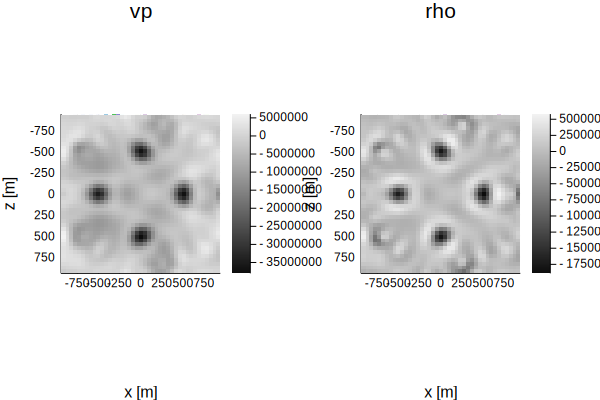

In [62]:
JF.update_observed_data!(pa, model, JF.ModFdtdBorn()) # generate Born observed data
JF.initialize!(pa)
@time migr = JuMIT.FWI.xfwi!(pa, JuMIT.FWI.Migr(), JF.ModFdtdBorn())
JuMIT.Plots.seismic(migr[1]) # first gradient

 ──────────────────────────────────────────────────────────────────
                           Time                   Allocations      
                   ──────────────────────   ───────────────────────
 Tot / % measured:      2.22s / 100%             576KiB / 44.1%    

 Section   ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────
 xfwi!          1    2.22s   100%   2.22s    254KiB  100%    254KiB
   Fadj!        1    1.52s  68.3%   1.52s   95.8KiB  37.7%  95.8KiB
   F!           1    704ms  31.7%   704ms    147KiB  57.8%   147KiB
 ──────────────────────────────────────────────────────────────────  2.224205 seconds (3.27 k allocations: 632.453 KiB)


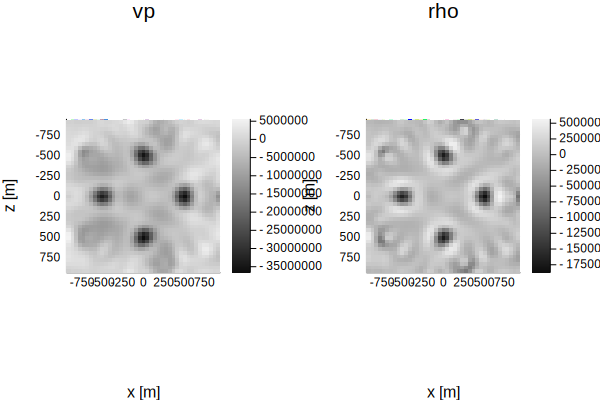

In [63]:
JF.update_observed_data!(pa, model, JF.ModFdtd()) # generate full wavefrom observed data
JF.initialize!(pa)
@time migr = JuMIT.FWI.xfwi!(pa, JuMIT.FWI.Migr(), JF.ModFdtd())
p1=JuMIT.Plots.seismic(migr[1]) # first gradient

In [64]:
# Do full waveform inversion
JuMIT.FWI.xfwi!(pa, JuMIT.FWI.LS(),JF.ModFdtd(),  bounded_flag=true, solver=:ipopt,ipopt_options=[["max_iter", 30]])

updating modm and modi...
> xfwi: number of inversion variables:	3362
This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     3362
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     3362
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective

-1

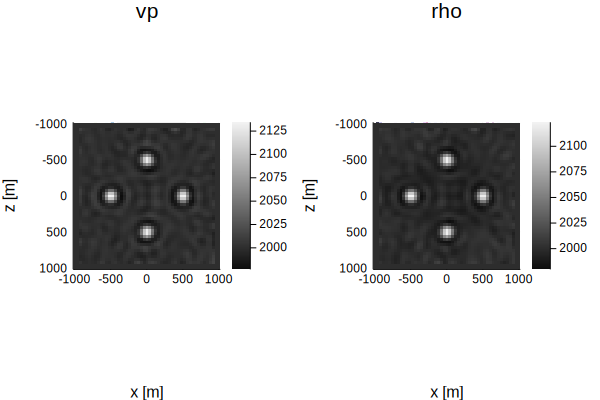

In [65]:
JP.seismic(pa.modm)